# Pairwise Comparisons

In [1]:
from pref_voting.pairwise_profiles import PairwiseBallot, PairwiseProfile
from pref_voting.voting_methods import *

In [2]:
A="A"
B="B"
C="C"
D="D"
E="E"

cands = [A, B, C, D, E]

lin_order_ballot = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}
complete_ranking_with_ties_ballot = {"A": 1, "B": 1, "C": 3, "D": 4, "E": 4}
bullet_ballot1 = {"A":1}
bullet_ballot2 = {"A":2}
partial_ballot = {"A":1, "C":2}
skipped_rank_ballot = {"A":1, "B":4}
tied_partial_ballot = {"A":1, "B":1, "C":2}
tied_partial_ballot1 = {"A":1, "B":1}
tied_partial_ballot2 = {"A":2, "B":2}
all_tied_ballot1 = {"A":1, "B":1, "C":1, "D":1, "E":1}
all_tied_ballot2 = {"A":2, "B":2, "C":2, "D":2, "E":2}

ballots = [lin_order_ballot, complete_ranking_with_ties_ballot, bullet_ballot1, bullet_ballot2, partial_ballot, skipped_rank_ballot, tied_partial_ballot1, tied_partial_ballot2, all_tied_ballot1, all_tied_ballot2]

In [3]:
def has_skipped_rank(ballot):
    ranks = sorted(set(ballot.values()))
    return ranks != list(range(1, len(ranks)+1))

for b in ballots:
    print(b)
    print("  has skipped rank?", has_skipped_rank(b))
    print()

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
  has skipped rank? False

{'A': 1, 'B': 1, 'C': 3, 'D': 4, 'E': 4}
  has skipped rank? True

{'A': 1}
  has skipped rank? False

{'A': 2}
  has skipped rank? True

{'A': 1, 'C': 2}
  has skipped rank? False

{'A': 1, 'B': 4}
  has skipped rank? True

{'A': 1, 'B': 1}
  has skipped rank? False

{'A': 2, 'B': 2}
  has skipped rank? True

{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1}
  has skipped rank? False

{'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 2}
  has skipped rank? True



In [4]:
def has_skipped_rank_above(ballot, cand):
    """Returns True if cand is ranked and there is a skipped rank above the rank of cand in ballot."""
    cand_rank = ballot.get(cand, None)
    if cand_rank is None:
        return False
    for rank in range(1, cand_rank):
        if rank not in ballot.values():
            return True
    return False

for b in ballots: 
    print(b)
    print("  has skipped rank above A?", has_skipped_rank_above(b, A))
    print("  has skipped rank above B?", has_skipped_rank_above(b, B))
    print("  has skipped rank above C?", has_skipped_rank_above(b, C))
    print("  has skipped rank above D?", has_skipped_rank_above(b, D))
    print("  has skipped rank above E?", has_skipped_rank_above(b, E))
    print()

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
  has skipped rank above A? False
  has skipped rank above B? False
  has skipped rank above C? False
  has skipped rank above D? False
  has skipped rank above E? False

{'A': 1, 'B': 1, 'C': 3, 'D': 4, 'E': 4}
  has skipped rank above A? False
  has skipped rank above B? False
  has skipped rank above C? True
  has skipped rank above D? True
  has skipped rank above E? True

{'A': 1}
  has skipped rank above A? False
  has skipped rank above B? False
  has skipped rank above C? False
  has skipped rank above D? False
  has skipped rank above E? False

{'A': 2}
  has skipped rank above A? True
  has skipped rank above B? False
  has skipped rank above C? False
  has skipped rank above D? False
  has skipped rank above E? False

{'A': 1, 'C': 2}
  has skipped rank above A? False
  has skipped rank above B? False
  has skipped rank above C? False
  has skipped rank above D? False
  has skipped rank above E? False

{'A': 1, 'B': 4}
  has skipped r

In [5]:
def infer_pairwise_comparison_from_ballot(ballot, cand1, cand2): 
    """Infers the pairwise comparison between cand1 and cand2 from ballot according tot he following rule: 

    - If both candidates are ranked, then the one with the lower rank is the pairwise choice; otherwise, they are both the pairwise choice (tie).
    - If only one candidate is ranked, then that candidate is the pairwise choice if there is not a skipped rank above that candidate; otherwise, the pairwise comparison is undetermined (None).
    - If neither candidate is ranked, then the pairwise comparison is undetermined (None).
    
    """
    rank_cand1 = ballot.get(cand1, None)
    rank_cand2 = ballot.get(cand2, None)
    menu = {cand1, cand2}
    if rank_cand1 is not None and rank_cand2 is not None:
        if rank_cand1 < rank_cand2:
            return (menu, {cand1}) # cand1 is chosen
        elif rank_cand2 < rank_cand1:
            return (menu, {cand2}) # cand2 is chosen
        else:
            return (menu, menu)  # tie
    # exactly one of the candidates is ranked
    elif (rank_cand1 is None or rank_cand2 is None) and not (rank_cand1 is None and rank_cand2 is None): 
        ranked_cand = cand1 if rank_cand1 is not None else cand2
        unranked_cand = cand2 if rank_cand1 is not None else cand1
        if not has_skipped_rank_above(ballot, ranked_cand):
            return (menu, {ranked_cand}) # ranked_cand is chosen
        else:
            return None # undetermined
    else: # neither candidate is ranked
        if not has_skipped_rank(ballot):
            return (menu, menu) # tie
        else:
            return None # undetermined

for b in ballots:
    print(b)
    for c1 in cands:
        for c2 in cands:
            if c1 < c2:
                print(f"  {c1} vs {c2}: {infer_pairwise_comparison_from_ballot(b, c1, c2)}")
    print()

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
  A vs B: ({'B', 'A'}, {'A'})
  A vs C: ({'C', 'A'}, {'A'})
  A vs D: ({'D', 'A'}, {'A'})
  A vs E: ({'E', 'A'}, {'A'})
  B vs C: ({'B', 'C'}, {'B'})
  B vs D: ({'D', 'B'}, {'B'})
  B vs E: ({'E', 'B'}, {'B'})
  C vs D: ({'D', 'C'}, {'C'})
  C vs E: ({'E', 'C'}, {'C'})
  D vs E: ({'D', 'E'}, {'D'})

{'A': 1, 'B': 1, 'C': 3, 'D': 4, 'E': 4}
  A vs B: ({'B', 'A'}, {'B', 'A'})
  A vs C: ({'C', 'A'}, {'A'})
  A vs D: ({'D', 'A'}, {'A'})
  A vs E: ({'E', 'A'}, {'A'})
  B vs C: ({'B', 'C'}, {'B'})
  B vs D: ({'D', 'B'}, {'B'})
  B vs E: ({'E', 'B'}, {'B'})
  C vs D: ({'D', 'C'}, {'C'})
  C vs E: ({'E', 'C'}, {'C'})
  D vs E: ({'D', 'E'}, {'D', 'E'})

{'A': 1}
  A vs B: ({'B', 'A'}, {'A'})
  A vs C: ({'C', 'A'}, {'A'})
  A vs D: ({'D', 'A'}, {'A'})
  A vs E: ({'E', 'A'}, {'A'})
  B vs C: ({'B', 'C'}, {'B', 'C'})
  B vs D: ({'D', 'B'}, {'D', 'B'})
  B vs E: ({'E', 'B'}, {'E', 'B'})
  C vs D: ({'D', 'C'}, {'D', 'C'})
  C vs E: ({'E', 'C'}, {'E', 'C'})
  

In [6]:
def ballot_to_pairwise(ballot, candidates):
    comparisons = []
    for c1 in candidates:
        for c2 in candidates:
            if c1 != c2:
                comparison = infer_pairwise_comparison_from_ballot(ballot, c1, c2)
                
                if comparison is not None:
                    if all([comparison[0] != menu for menu, _ in comparisons]):
                        comparisons.append(comparison)

    for menu, choice in comparisons:
        if not choice.issubset(menu):
            print("Invalid choice:", choice, "not subset of menu:", menu)
        menus = [menu for menu, _ in comparisons]
        if not len(menus) == len(set(frozenset(menu) for menu in menus)):
            print("Duplicate menu:", menu)

    return PairwiseBallot(comparisons, candidates=candidates)

In [7]:
for b in ballots:
    print(b)
    pb = ballot_to_pairwise(b, cands)
    print("  ", pb)
    print("    is transitive?", pb.is_transitive(cands))
    print("    is coherent", pb.is_coherent())
    print("    is empty", pb.is_empty())
    if pb.is_coherent() and pb.is_transitive(cands):
        print("    ranking: ", pb.to_ranking())
    for c in cands:
        print(f"  strict preference of {A} over {c}? {pb.strict_pref(A, c)} ")
    print()

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
   {A, B} -> {A}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}, {B, C} -> {B}, {B, D} -> {B}, {B, E} -> {B}, {C, D} -> {C}, {C, E} -> {C}, {D, E} -> {D}
    is transitive? True
    is coherent True
    is empty False
    ranking:  A B C D E 
  strict preference of A over A? False 
  strict preference of A over B? True 
  strict preference of A over C? True 
  strict preference of A over D? True 
  strict preference of A over E? True 

{'A': 1, 'B': 1, 'C': 3, 'D': 4, 'E': 4}
   {A, B} -> {A, B}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}, {B, C} -> {B}, {B, D} -> {B}, {B, E} -> {B}, {C, D} -> {C}, {C, E} -> {C}, {D, E} -> {D, E}
    is transitive? True
    is coherent True
    is empty False
    ranking:  ( B  A ) C ( D  E ) 
  strict preference of A over A? False 
  strict preference of A over B? False 
  strict preference of A over C? True 
  strict preference of A over D? True 
  strict preference of A over E? True 

{'A': 1}
   {A, B} -> {A}

1: {A, B} -> {A}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}, {B, C} -> {B}, {B, D} -> {B}, {B, E} -> {B}, {C, D} -> {C}, {C, E} -> {C}, {D, E} -> {D}
1: {A, B} -> {A, B}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}, {B, C} -> {B}, {B, D} -> {B}, {B, E} -> {B}, {C, D} -> {C}, {C, E} -> {C}, {D, E} -> {D, E}
1: {A, B} -> {A}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}, {B, C} -> {B, C}, {B, D} -> {B, D}, {B, E} -> {B, E}, {C, D} -> {C, D}, {C, E} -> {C, E}, {D, E} -> {D, E}
1: 
1: {A, B} -> {A}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}, {B, C} -> {C}, {B, D} -> {B, D}, {B, E} -> {B, E}, {C, D} -> {C}, {C, E} -> {C}, {D, E} -> {D, E}
1: {A, B} -> {A}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}
1: {A, B} -> {A, B}, {A, C} -> {A}, {A, D} -> {A}, {A, E} -> {A}, {B, C} -> {B}, {B, D} -> {B}, {B, E} -> {B}, {C, D} -> {C, D}, {C, E} -> {C, E}, {D, E} -> {D, E}
1: {A, B} -> {A, B}
1: {A, B} -> {A, B}, {A, C} -> {A, C}, {A, D} -> {A, D}, {A, E} -> {A, E}, {B, C} -> {B, C}, {B, D} -> {B, D}

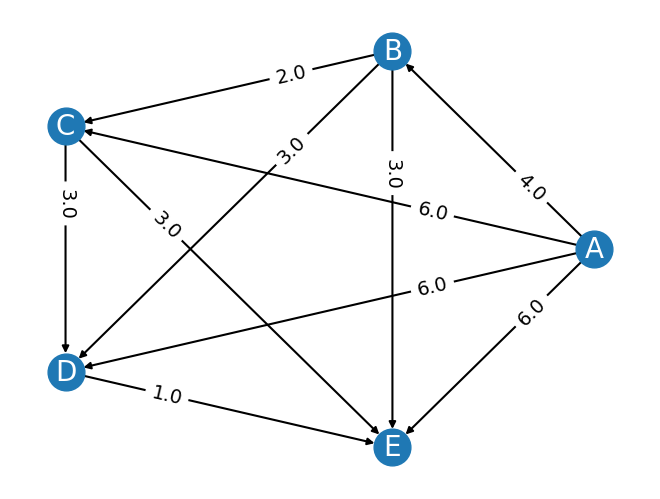

10


In [8]:
pprof = PairwiseProfile([ballot_to_pairwise(b, cands) for b in ballots], candidates=cands)

pprof.display()

MWSL(pprof)

for c in cands:
    for d in cands:
        if c != d:
            print(f"Majority margin of {c} over {d}: {pprof.margin(c, d)}")
            print(f" Support for {c} over {d}: {pprof.support(c, d)}")
            print(f" Support for {d} over {c}: {pprof.support(d, c)}\n")
pprof.margin_graph().display()
print(pprof.num_voters)



In [23]:
print(sum([c for b,c in zip(*pprof.comparisons_counts) if b.is_empty()]))

print(sum([c for b,c in zip(*pprof.comparisons_counts) if b.is_transitive(pprof.candidates) and b.is_coherent() and not b.is_empty() and b.to_ranking().is_bullet_vote() ]))


print(sum([c for b,c in zip(*pprof.comparisons_counts) if b.is_transitive(pprof.candidates) and b.is_coherent() and not b.is_empty() and b.to_ranking().is_linear(len(pprof.candidates)) ]))

print(sum([c for b,c in zip(*pprof.comparisons_counts) if b.is_transitive(pprof.candidates) and b.is_coherent() and not b.is_empty() and b.to_ranking().has_tie()]))

print(sum([c for b,c in zip(*pprof.comparisons_counts) if b.has_tie()]))



1
1
1
6
7


In [ ]:
r = Ranking({
    A:1,
    B:3,
    C:3,
    D:3, 
})
print(r.is_bullet_vote())

len(r.first()) == 1 and len(r.ranks) ==2

False


True

In [39]:
r = Ranking({
    A:2,
    B:3,
})
print(r.is_truncated_linear(4))



True
